In [15]:
using CMBLensing
using CMBLensing: ode4
using PyPlot

In [2]:
cls = class();

In [3]:
T=Float64
nside=512
P=Flat{1//8,nside}

CMBLensing.Flat{1//8,512}

In [4]:
Cf = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:tt])
# Cf = Cℓ_to_cov(T,P,S2,cls[:ℓ],cls[:ee],cls[:bb])
Cϕ = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:ϕϕ])

CMBLensing.FullDiagOp{CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}},CMBLensing.Flat{1//8,512},CMBLensing.S0,CMBLensing.Fourier}(CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}}(Complex{Float64}[0.0+0.0im 1.90847e-17+0.0im … 4.27193e-19+0.0im 1.90847e-17+0.0im; 1.90847e-17+0.0im 2.96612e-18+0.0im … 2.2695e-19+0.0im 2.96612e-18+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]))

In [16]:
srand(3)
f = simulate(Cf)
ϕ = simulate(Cϕ)
f2 = ud_grade(f,2)
ϕ2 = ud_grade(ϕ,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([4.06508e-7 4.11041e-7 … 3.53952e-7 3.86304e-7; 2.71939e-7 2.98234e-7 … 2.07136e-7 2.41801e-7; … ; 6.89122e-7 6.63159e-7 … 6.84112e-7 6.93979e-7; 5.47404e-7 5.3637e-7 … 5.15038e-7 5.39166e-7])

In [17]:
# Ml = ones(Complex{T},nside÷2+1,nside)
# i = indexin([-FFTgrid(T,P).nyq],FFTgrid(T,P).k)[1]
# Ml[:,i] = Ml[i,:] = 0
# Mff = FullDiagOp(FlatS2EBFourier{T,P}(repeated(Ml,2)...))

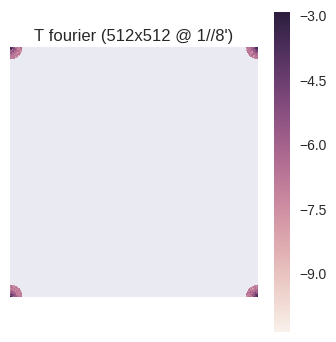

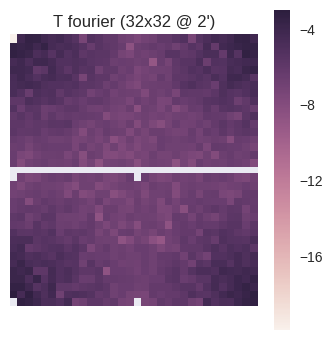

In [18]:
plot(f,which=[:Tl])
plot(f2,which=[:Tl])

In [19]:
LF=LenseFlow{ode4{14}}
PL=PowerLens{10}

CMBLensing.PowerLens{10,F} where F<:(CMBLensing.Field{#s70,#s69,B} where B<:CMBLensing.Basis where #s69<:CMBLensing.S0 where #s70)

In [20]:
truth = ud_grade(LF(ϕ)*f,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([-108.749 -108.0 … -69.8889 -94.5465; -72.5922 -71.552 … -39.9698 -62.5323; … ; -95.9261 -103.906 … -40.1655 -68.5557; -112.863 -116.283 … -62.9717 -91.5293])

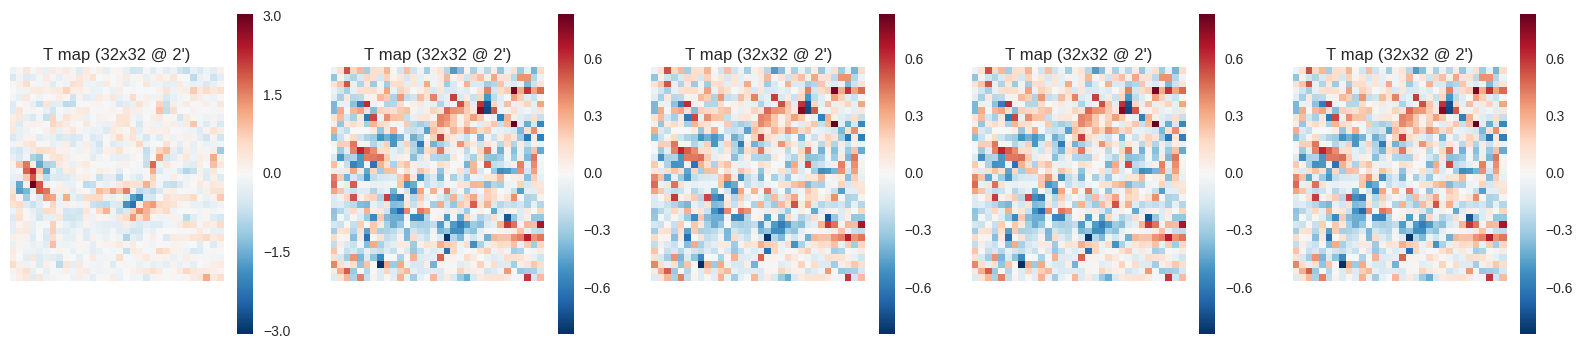

In [21]:
plot([PowerLens{i}(ϕ2)*f2-truth for i=[2,5,7,10,20]]')

In [22]:
dat = [ϕ f LF(ϕ)*f-f;
LF(ϕ2)*f2-truth  PL(ϕ2)*f2-truth LF(ϕ2)*f2-PL(ϕ2)*f2];

In [23]:
# vlim(x) = Dict(:vmin=>-x,:vmax=>x,:rasterized=>true)
# fig,axs=subplots(2,3,figsize=(10,5))
# plot(1e5*dat[1,1][:Tx]; ax=axs[1,1], title=raw"$10^5\phi$", vlim(1)...)
# plot(dat[1,2][:Bx]; ax=axs[1,2], title=raw"$\tilde T$", vlim(1)...)
# plot(dat[1,3][:Bx]; ax=axs[1,3], title=raw"$\tilde T - T$", vlim(70)...)
# plot(dat[2,1][:Bx]; ax=axs[2,1], title=raw"LenseFlow: $\tilde T_{\rm pix} - \tilde T$", vlim(10)...)
# plot(dat[2,2][:Bx]; ax=axs[2,2], title=raw"PowerLens: $\tilde T_{\rm pix} - \tilde T$", vlim(10)...)
# plot(dat[2,3][:Bx]; ax=axs[2,3], title=raw"LenseFlow - PowerLens", vlim(10)...);
# # savefig("../paper/figs/lenseflow_pixlens.pdf",bbox_inches="tight")

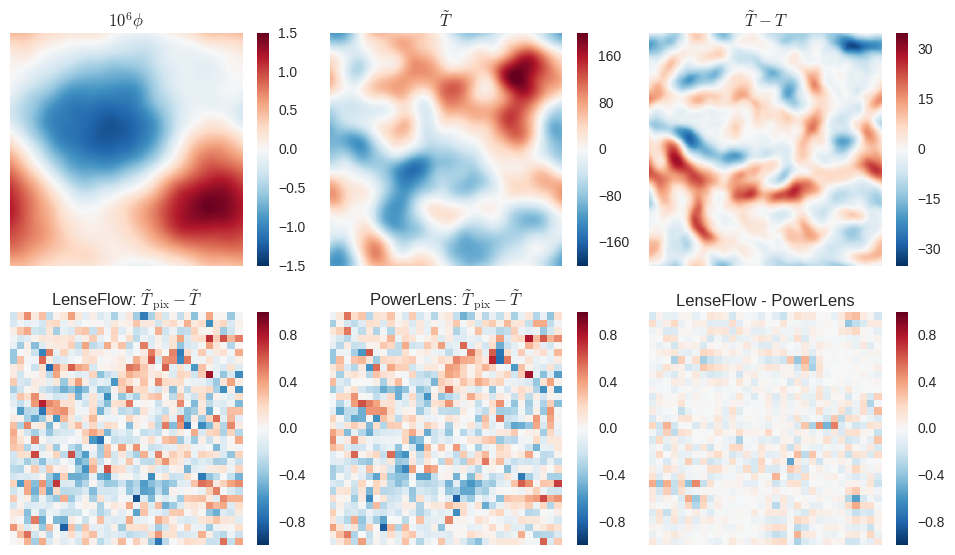

In [24]:
vlim(x) = Dict(:vmin=>-x,:vmax=>x,:rasterized=>true)
s = 4
fig,axs=subplots(2,3,figsize=(3s,2s/1.25))
subplots_adjust(wspace=0.1)

plot(1e6*dat[1,1][:Tx]; ax=axs[1,1], title=raw"$10^6\phi$", vlim(1.5)...)
plot(dat[1,2][:Tx]; ax=axs[1,2], title=raw"$\tilde T$", vlim(200)...)
plot(dat[1,3][:Tx]; ax=axs[1,3], title=raw"$\tilde T - T$", vlim(35)...)
plot(dat[2,1][:Tx]; ax=axs[2,1], title=raw"LenseFlow: $\tilde T_{\rm pix} - \tilde T$", vlim(1.)...)
plot(dat[2,2][:Tx]; ax=axs[2,2], title=raw"PowerLens: $\tilde T_{\rm pix} - \tilde T$", vlim(1.)...)
plot(dat[2,3][:Tx]; ax=axs[2,3], title=raw"LenseFlow - PowerLens", vlim(1.)...);
savefig("../paper/figs/lenseflow_pixlens.pdf",bbox_inches="tight")